Import important modules

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

Creating data

In [3]:
input_list = np.random.randint(0, 40000, (5000, 2))

output_list = input_list[:, 0] * input_list[:, 1]

# reshape the result array to a column vector
output_list = output_list.reshape(-1, 1)

Splitting data into training and testing

In [4]:
input_list_train, input_list_test, output_list_train, output_list_test = train_test_split(input_list, output_list, test_size=0.2)

Defining keras model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

Compiling the model

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

Training the model

In [9]:
fitValues = model.fit(input_list, output_list, epochs=600, batch_size=400)

Epoch 1/600
13/13 [==============================] - 0s 3ms/step - loss: 41175542229106688.0000
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 41176156409430016.0000
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 41175915891261440.0000
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 41176109164789760.0000
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 41176134934593536.0000
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 41176585906159616.0000
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 41179029742551040.0000
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 41175877236555776.0000
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 41175610948583424.0000
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 41175649603289088.0000
Epoch 11/600
13/13 [===================

Create a plot from the training losses x epoch

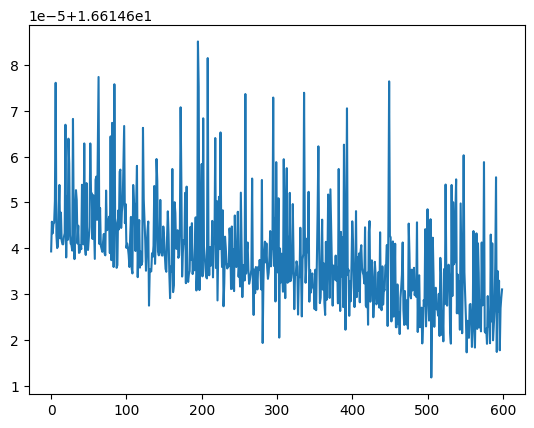

[4.117554222910669e+16, 4.117615640943002e+16, 4.117591589126144e+16, 4.117610916478976e+16, 4.117613493459354e+16, 4.117658590615962e+16, 4.117902974255104e+16, 4.117587723655578e+16, 4.117561094858342e+16, 4.117564960328909e+16, 4.117634968295834e+16, 4.117691661864141e+16, 4.117581281204634e+16, 4.117634538799104e+16, 4.117576556740608e+16, 4.117569255296205e+16, 4.117568825799475e+16, 4.117584287681741e+16, 4.117592018622874e+16, 4.117816215915725e+16, 4.11754176750551e+16, 4.117668898537472e+16, 4.117577845230797e+16, 4.117787439634842e+16, 4.11773590002729e+16, 4.117588153152307e+16, 4.117570114289664e+16, 4.117567537309286e+16, 4.117555940897587e+16, 4.117828241824154e+16, 4.117611775472435e+16, 4.117538331531674e+16, 4.117637115779482e+16, 4.117680924445901e+16, 4.11766030860288e+16, 4.117570543786394e+16, 4.117607480505139e+16, 4.117551216433562e+16, 4.11755250492375e+16, 4.117567107812557e+16, 4.117558947374694e+16, 4.11769209136087e+16, 4.117658161119232e+16, 4.1175688257994

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

y = [math.log(i, 10) for i in list(fitValues.history["loss"])]
x = [i for i in range(len(list(y)))]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()
print(fitValues.history["loss"])

Making predictions with our new model

In [11]:
new_input = np.array([[80, 70], [50, 30], [90, 100]])
predictions = model.predict(new_input)
print("{:<10s}{:<15s}{}".format(" ", "prediction", "actual"))
for i in range(len(predictions)):
    x, y = new_input[i]
    predicted_val = predictions[i][0]
    actual_val = x * y
    print("{:<10s}{:<15s}{}".format(str(x) + "*" + str(y) + ":", str(predicted_val), str(actual_val)))

1/1 [==============================] - 0s 63ms/step
          prediction     actual
80*70:    1699732.1      5600
50*30:    896674.8       1500
90*100:   2159592.0      9000


Evaluating the Ultimate AI that we just made!!!!!

In [12]:
loss = model.evaluate(input_list_test, output_list_test)
score = 1 / (1 + loss)  # Convert the loss to a score
print("score:" + str(score))

32/32 [==============================] - 0s 2ms/step - loss: 41648280689442816.0000
score:2.4010594998066374e-17


Check if this model is already exported, if not export it

In [13]:
import pickle
import os
import pathlib

oneUp = pathlib.Path(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
print("oneUp:", oneUp)

preModels = pathlib.Path(oneUp.joinpath('preTrainedModels'))
preModels.mkdir(parents=True, exist_ok=True) #If preModels dosent exist, create it
print("preModels:", preModels)

pkFile = oneUp.joinpath(preModels).joinpath("NN-Mul.pkl")
pkFile = pathlib.Path(preModels.joinpath("NN-Mul.pkl"))
print("pkFile", pkFile)

with pkFile.open('w+b') as f: # 'w' = write, '+' = create file if non existant, 'b' = write in binary
    pickle.dump(model, f)

/home/martin/Desktop/simplePythonAI/preTrainedModels/NN-Mul.pkl
False


In [14]:
with open(pkFile, "rb") as f:
    data = pickle.load(f)
    print("data type"+str(type(data)))
    numbers = np.array([[15, 15]])
    prediction = data.predict(numbers)
    print(prediction)

data type<class 'keras.engine.sequential.Sequential'>
1/1 [==============================] - 0s 45ms/step
[[324905.84]]
